# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import collections
import math

In [20]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def average(xs):
    return sum(xs)/len(xs)
    
def variance(xs):
    n = len(xs)
    mean = average(xs)
    differences = [(x-mean)**2 for x in xs]
    
    return sum(differences)/n
    
def stddev(xs):
    return math.sqrt(variance(xs))

def describe(xs):
    desc = collections.namedtuple("Description", ["mean", "var", "std"])
    return desc(
        mean = average(xs),
        var = variance(xs),
        std = stddev(xs)
    )

In [21]:
describe(sales)

Description(mean=3052.714285714286, var=183761.06122448976, std=428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [30]:
customers = [127, 80, 105, 92, 120, 115, 93]

def covariance(xs,ys):
    assert(len(xs) == len(ys))
    
    xs_mean = average(xs)
    ys_mean = average(ys)
    dxs = [y-ys_mean for y in ys]
    dys = [x-xs_mean for x in xs]
    differences = [dxs*dys for dxs, dys in zip(dxs, dys)]
    return sum(differences)/(len(xs)-1)

In [31]:
covariance(sales, customers)

7604.357142857142

In [33]:
np.cov(sales, customers)

array([[ 214387.9047619 ,    7604.35714286],
       [   7604.35714286,     290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [43]:
def correlation_coefficient(xs, ys):
    xs_std = describe(xs).std
    ys_std = describe(ys).std
    cov = covariance(xs, ys)
    
    return cov/(xs_std*ys_std)

In [44]:
describe(customers)

Description(mean=104.57142857142857, var=249.3877551020408, std=15.792015549069118)

In [45]:
correlation_coefficient(sales, customers)

1.123306307450706

In [46]:
np.corrcoef(sales, customers)

array([[ 1.        ,  0.96283398],
       [ 0.96283398,  1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

In [135]:
titanic_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic = pd.read_csv(titanic_url)
numerical_titanic = titanic.select_dtypes(np.number)

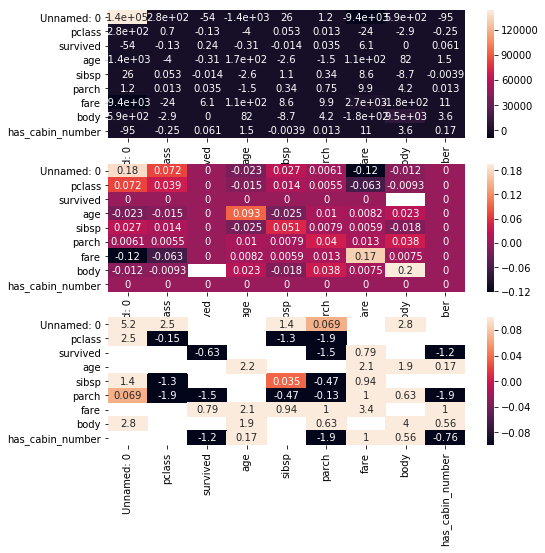

In [139]:
fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(8,8))

sns.heatmap(numerical_titanic.cov(), ax=ax, annot=True)
sns.heatmap(numerical_titanic.apply(np.log10).cov(), ax=bx, annot=True)
sns.heatmap(numerical_titanic.cov().apply(np.log10), ax=cx, annot=True)

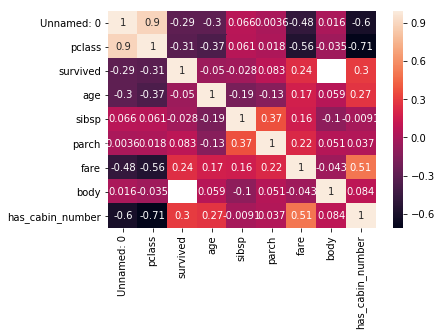

In [141]:
sns.heatmap(numerical_titanic.corr(), annot=True)

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [81]:
X = [0, 1]
Y = [1, 0]

Text(0.5,1,'Orthogonal Vectors')

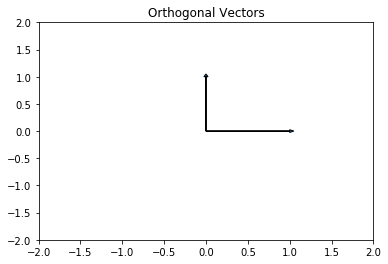

In [82]:
plt.arrow(0,0, *X, head_length=0.05, head_width=0.05)
plt.arrow(0,0, *Y, head_length=0.05, head_width=0.05)

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.title("Orthogonal Vectors")

In [79]:
print("""
    Another term for orthogonal vectors is linearly independence, which is to say that they exist along different dimensions.
""")


    Another term for orthogonal vectors is linearly independence, which is to say that they exist along different dimensions.



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [84]:
A = [-5, 3, 7]
B = [6, -8, 2]

In [85]:
if np.dot(A, B) == 0:
    print("Because the dot product of A and B is 0, A and B are orthogonal to each other")
else:
    print("Because the dot product of A and B is not 0, A and B are not orthogonal")

Because the dot product of A and B is not 0, A and B are not orthogonal


Text(0.5,0.92,'Plotting Linearly Dependent Vectors in 3 Dimensions')

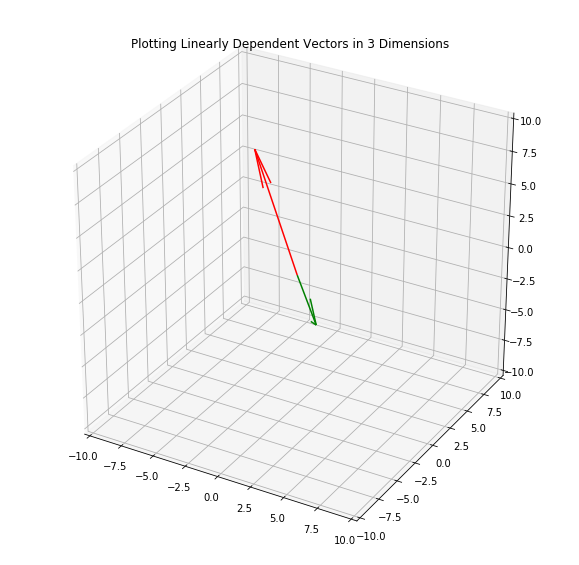

In [87]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *A, color='red')
ax.quiver(0, 0, 0, *B, color='green')

ax.set_xlim( -10, 10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

ax.set_title("Plotting Linearly Dependent Vectors in 3 Dimensions")

## 2.3 Compute the following values: What do these quantities have in common?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [47]:
c = np.array([2, -15, 6, 20])

## What is $||c||^2$? 

In [10]:
np.linalg.norm(c)**2

665.0

## What is $c \cdot c$? 

In [8]:
np.dot(c,c)

665

## What is $c^{T}c$?

In [11]:
np.matmul(c.T, c)

665

## What do these quantities have in common?

They each give the size of the vector $c$, in this case 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$
d = 
{ 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} } 
= { 7\hat{i} + 12\hat{j} }
$$


$$
e = 
{27\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} } 
= { 7\hat{i} + 12\hat{j} + -9\hat{k}} \\
$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [267]:
f = np.array([4, 12, 11, 9 , 2])
unit_vector = (1/np.linalg.norm(f))*f

unit_vector

array([ 0.20908335,  0.62725005,  0.57497921,  0.47043754,  0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

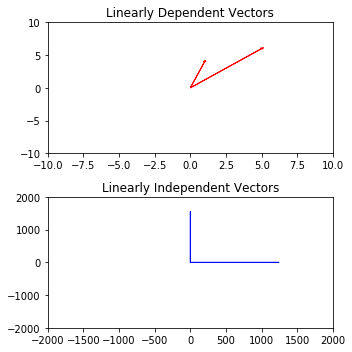

In [98]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(5,5))

origin = [0, 0]
A = [1, 4]
B = [5, 6]

ax.arrow(*origin, *A, head_length=0.2, head_width=0.2, color='red')
ax.arrow(*origin, *B, head_length=0.2, head_width=0.2, color='red')

ax.set_title("Linearly Dependent Vectors")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

C = [0, 1562]
D = [1244, 0]

bx.arrow(*origin, *C, head_length=0.2, head_width=0.2, color='blue')
bx.arrow(*origin, *D, head_length=0.2, head_width=0.2, color='blue')

bx.set_title("Linearly Independent Vectors")
bx.set_xlim(-2000, 2000)
bx.set_ylim(-2000, 2000)

np.dot(A,B), np.dot(C, D)

fig.tight_layout()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Given that $g$ and $h$ are linearly dependent, the span of $g$ and $h$ is the set of all vectors generated by summing and subtracting those two vectors in an arbitrary manner from each other, an example is given below, but you can considered the line plotted to be an infinite straight line which contains all such outcomes of the aforementioned operations.

Text(0.5,1,'The Span of Two Linearly Dependent Vectors')

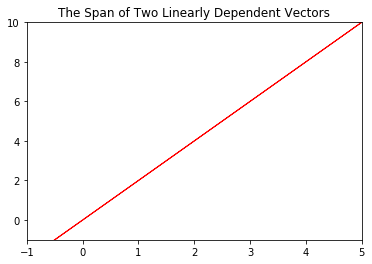

In [100]:
origin = np.array([0 , 0])
g = np.array([1, 2])
h = np.array([4, 8])

# plt.arrow(*origin, *g, head_length=0.2, head_width=0.2, color='blue')
# plt.arrow(*origin, *h, head_length=0.2, head_width=0.2, color='green')

plt.arrow(*origin, *g+h, head_length=0.2, head_width=0.2, color='red')
plt.arrow(*origin, *g-h, head_length=0.2, head_width=0.2, color='red')

plt.xlim(-1,5)
plt.ylim(-1,10)

plt.title("The Span of Two Linearly Dependent Vectors")

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span of $l$, $m$, and $n$ is the whole of $\mathbb{R}^3$ as indicated by the linear dependence between each of the vectors given. 

You can also tell that these vectors span $\mathbb{R}^3$ as none of the eigenvalues of the matrix formed by these values is $0$, a third such 'tell' is that the rank of the matrix is $3$, indicating that the subspace spanned by the three vectors is at least $3$ dimensional.

In [102]:
origin = np.array([0, 0, 0])
L = np.array([1, 2, 3])
M = np.array([-1, 0, 7])
N = np.array([4, 8, 2])

In [103]:
L.dot(M), L.dot(N), M.dot(N)

(20, 26, 10)

In [104]:
A = np.matrix([L, M, N])

In [105]:
np.linalg.matrix_rank(A)

3

In [106]:
eigenvalues, eigenvectors =  np.linalg.eig(A.T)

eigenvalues

array([ 9.50916765,  0.30849762, -6.81766527])

Text(0.5,0.92,'The three vectors span all of $\\mathbb{R}^3$ and thus can be \nmade to sum or scale to any member of $\\mathbb{R}^3$')

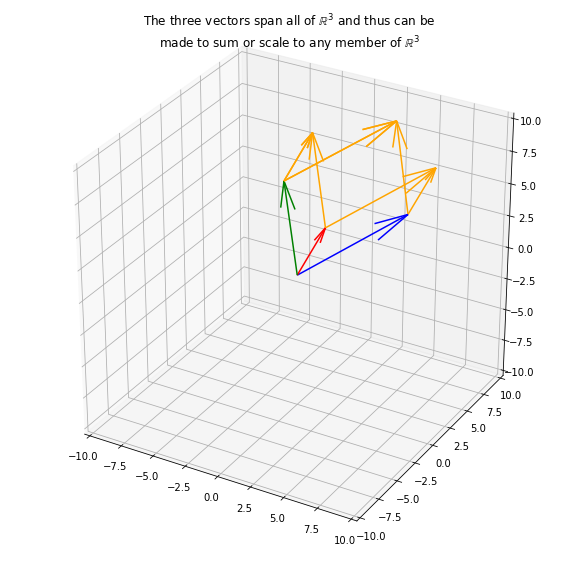

In [109]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*origin, *L, color='red')
ax.quiver(*origin, *M, color='green')
ax.quiver(*origin, *N, color='blue')

ax.quiver(*M, *L, color='orange')
ax.quiver(*M, *N, color='orange')

ax.quiver(*N, *L, color='orange')
ax.quiver(*N, *M, color='orange')

ax.quiver(*M, *L, color='orange')
ax.quiver(*M, *N, color='orange')

ax.quiver(*L, *M, color='orange')
ax.quiver(*L, *N, color='orange')

ax.set_xlim(-10, 10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

ax.set_title("The three vectors span all of $\mathbb{R}^3$ and thus can be \nmade to sum or scale to any member of $\mathbb{R}^3$")

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



Text(0.5,1,"The basis of any dimension is it's set of unit vectors.")

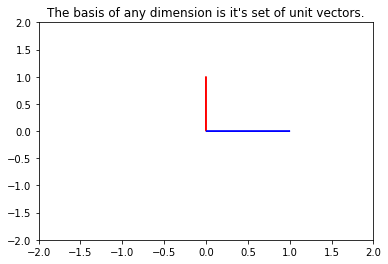

In [110]:
origin = [0, 0]
X = [0, 1]
Y = [1, 0]

plt.arrow(*origin, *X, color='red')
plt.arrow(*origin, *Y, color='blue')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.title("The basis of any dimension is it's set of unit vectors.")

## 6.2 What does it mean to form a basis?

The base of a vector space is the set of vectors from which any vector in said vector space can be derived as resultant from some linear combination of those base vectors. So in the case of the real-valued plane $\mathbb{R}^2$, some arbitrary some consisting only of $[0, 1]$ and $[1, 0]$ as it's terms can be composed to generate every point in the plane.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [75]:
P = np.matrix(
    [[ 1, 2, 3], 
     [-1, 0, 7], 
     [ 4, 8, 2]]
)

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix indicates the dimension of the space spaned by the vectors that compose said matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [52]:
origin = [0, 0]
V = np.array([1, 3])
W = np.array([-1, 2])

In [71]:
def proj(A, B):
    """ The projection of a vector A onto a vector B. """
    return (A.dot(B)/np.linalg.norm(B))*(B/np.linalg.norm(B))

proj(W, V)

array([ 0.5,  1.5])

Text(0.5,1,'Vector W projected onto Vector V')

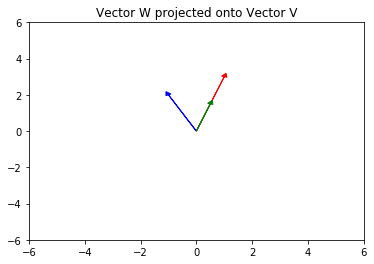

In [111]:
plt.arrow(*origin, *V, head_length=0.2, head_width=0.2, color='red')
plt.arrow(*origin, *W, head_length=0.2, head_width=0.2, color='blue')
plt.arrow(*origin, *proj(W, V), head_length=0.2, head_width=0.2, color='green')

plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.title("Vector W projected onto Vector V")

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.